In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Reading the Dataset

In [67]:
df = pd.read_csv('Admission_Predict.csv')
df.rename(columns={'Chance of Admit ':'Chance of Admit'}, inplace=True)
df.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


### Setting dependent and independent

In [68]:
x = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [69]:
# Spliting into training and test set, to train the model
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=0)

### Training the model

In [70]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
ypred = reg.predict(xtest)


np.set_printoptions(precision=2)
ypred = ypred.reshape(len(ypred),1)

ytest = np.array(ytest).reshape(len(ytest),1)

In [73]:
print(np.concatenate((ypred, ytest), 1))

[[0.7  0.71]
 [0.69 0.7 ]
 [0.78 0.79]
 [0.62 0.73]
 [0.72 0.72]
 [0.6  0.48]
 [0.71 0.77]
 [0.64 0.71]
 [0.87 0.9 ]
 [0.92 0.94]
 [0.54 0.58]
 [0.89 0.89]
 [0.71 0.72]
 [0.46 0.57]
 [0.85 0.78]
 [0.62 0.42]
 [0.63 0.64]
 [0.81 0.84]
 [0.58 0.63]
 [0.73 0.72]
 [0.88 0.9 ]
 [0.84 0.83]
 [0.66 0.57]
 [0.46 0.47]
 [0.78 0.85]
 [0.58 0.67]
 [0.5  0.44]
 [0.64 0.54]
 [0.89 0.92]
 [0.65 0.62]
 [0.64 0.68]
 [0.74 0.73]
 [0.74 0.73]
 [0.56 0.61]
 [0.78 0.55]
 [0.77 0.74]
 [0.65 0.64]
 [0.86 0.89]
 [0.63 0.73]
 [0.93 0.95]
 [0.73 0.71]
 [0.67 0.72]
 [0.71 0.75]
 [0.81 0.76]
 [0.82 0.86]
 [0.65 0.7 ]
 [0.56 0.39]
 [0.69 0.79]
 [0.61 0.61]
 [0.6  0.64]
 [0.68 0.71]
 [0.8  0.8 ]
 [0.65 0.61]
 [0.88 0.89]
 [0.72 0.68]
 [0.75 0.79]
 [0.71 0.78]
 [0.73 0.52]
 [0.76 0.76]
 [0.83 0.88]
 [0.77 0.74]
 [0.47 0.49]
 [0.64 0.65]
 [0.52 0.59]
 [0.84 0.87]
 [0.82 0.89]
 [0.74 0.81]
 [0.87 0.9 ]
 [0.77 0.8 ]
 [0.75 0.76]
 [0.6  0.68]
 [0.83 0.87]
 [0.83 0.68]
 [0.61 0.64]
 [0.93 0.91]
 [0.63 0.61]
 [0.64 0.69]

### Visualising the Result

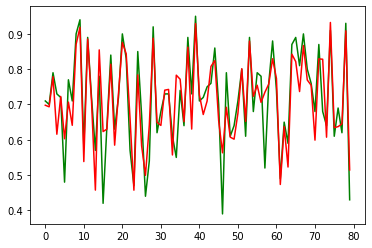

In [74]:
plt.plot(ytest, color='green')
plt.plot(ypred, color='red')
plt.show()

In [75]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Importance of the features in determining the outcome

In [77]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor()
classifier.fit(x,y)
#feature_names = x.columns
importance_frame = pd.DataFrame()
importance_frame['features'] = x.columns
importance_frame['importance'] = classifier.feature_importances_

importance_frame = importance_frame.sort_values(by=['importance'])

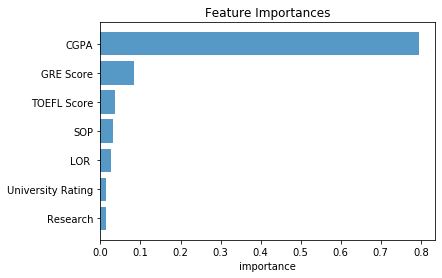

In [78]:
plt.barh([1,2,3,4,5,6,7], importance_frame['importance'], align='center', alpha=0.75)
plt.yticks([1,2,3,4,5,6,7], importance_frame['features'])
plt.xlabel('importance')
#plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()